<a href="https://colab.research.google.com/github/chimaCSC102/chimas-_python_projects/blob/main/cat_dog_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [32]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

test_dir = os.path.join(PATH, 'test')
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')


# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = sum([len(files) for r, d, files in os.walk(test_dir)])

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

--2023-04-16 23:20:19--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip.4’

cats_and_dogs.zip.4 100%[===================>]  67.43M   379MB/s    in 0.2s    

2023-04-16 23:20:19 (379 MB/s) - ‘cats_and_dogs.zip.4’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
replace cats_and_dogs/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
  inflating: cats_and_dogs/test/48.jpg  
  inflating: cats_and_dogs/test/49.jpg  
  inflating: cats_and_dogs/test/8.jpg  
  inflating: cats_and_dogs/test/9.jpg  
  inflating: cats_and_dogs/test/14.jpg  
  inflating: cats_and_dogs/test/28.jpg  
  inflating: cats_and_dogs/test/29.jpg  
  inflating: cats_and_dogs/test/15.jpg 

In [34]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)


# Define the generators for train, validation, and test sets
test_data_gen = test_image_generator.flow_from_directory(directory=test_dir,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          batch_size=batch_size,
                                                          shuffle = False,
                                                          class_mode='binary')

train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           batch_size=batch_size,
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                               batch_size=batch_size,
                                                               class_mode='binary')


Found 50 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


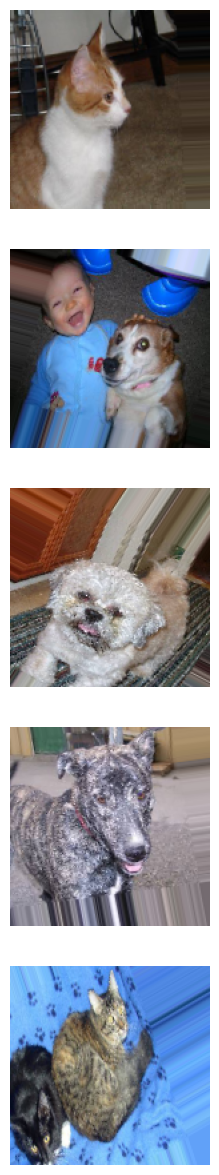

In [49]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [36]:
#addition of transformations

train_image_generator = ImageDataGenerator(
      rotation_range = 40,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True,
      rescale=1./255,
      fill_mode = 'nearest')



Found 2000 images belonging to 2 classes.


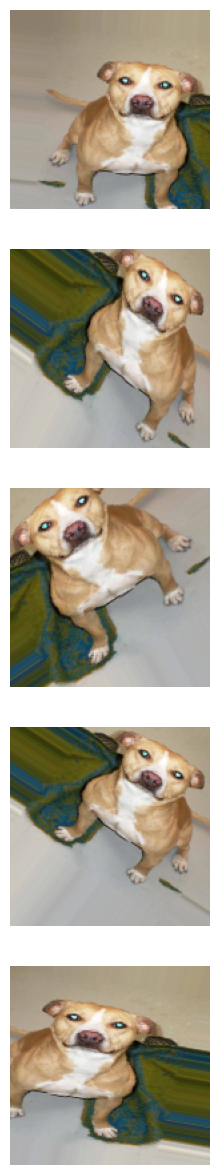

In [37]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [38]:
from tensorflow.keras.metrics import SparseCategoricalCrossentropy

from tensorflow.keras import datasets, layers, models
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [60]:
history = model.fit(train_data_gen, epochs=5, validation_data=val_data_gen)

test_loss, test_acc = model.evaluate(test_data_gen, verbose = 2)
print("Accuracy: ", test_acc)

Epoch 1/5
16/16 [==============================] - 51s 3s/step - loss: 0.5612 - accuracy: 0.7125 - val_loss: 0.5630 - val_accuracy: 0.6910
Epoch 2/5
16/16 [==============================] - 47s 3s/step - loss: 0.5725 - accuracy: 0.7045 - val_loss: 0.5362 - val_accuracy: 0.7260
Epoch 3/5
16/16 [==============================] - 48s 3s/step - loss: 0.5321 - accuracy: 0.7360 - val_loss: 0.5303 - val_accuracy: 0.7360
Epoch 4/5
16/16 [==============================] - 48s 3s/step - loss: 0.5374 - accuracy: 0.7335 - val_loss: 0.5121 - val_accuracy: 0.7480
Epoch 5/5
16/16 [==============================] - 51s 3s/step - loss: 0.5283 - accuracy: 0.7280 - val_loss: 0.5037 - val_accuracy: 0.7610
1/1 - 0s - loss: 0.7768 - accuracy: 0.5400 - 331ms/epoch - 331ms/step
Accuracy:  0.5400000214576721


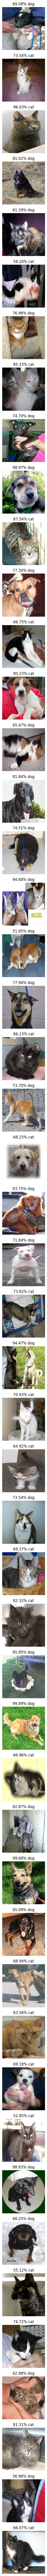

1/1 [==============================] - 1s 521ms/step
[0.6907501816749573, 0.2645673155784607, 0.03971472382545471, 0.8102317452430725, 0.6129283905029297, 0.4179733693599701, 0.7696082592010498, 0.14673271775245667, 0.7469731569290161, 0.9896687269210815, 0.12457292526960373, 0.7730059623718262, 0.33245185017585754, 0.19770106673240662, 0.6547307372093201, 0.8183826208114624, 0.7450575828552246, 0.9468003511428833, 0.5164905190467834, 0.7794166803359985, 0.1386510580778122, 0.7370148301124573, 0.3175426125526428, 0.8374964594841003, 0.7184332609176636, 0.2617615759372711, 0.9447453618049622, 0.2907252013683319, 0.3507716953754425, 0.7354085445404053, 0.3062925636768341, 0.17680975794792175, 0.8594951629638672, 0.9988918304443359, 0.33044227957725525, 0.8286739587783813, 0.9968217015266418, 0.8509151339530945, 0.31063112616539, 0.36443665623664856, 0.3082139194011688, 0.47150805592536926, 0.9893044233322144, 0.6825447678565979, 0.44883057475090027, 0.2527891993522644, 0.6298224925994873

In [86]:

def plotImages(images_arr, probabilities):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(test_data_gen)
plotImages(sample_training_images[:50], probabilities)


#prediction
probabilities = model.predict(test_data_gen)

probabilities = [float(prob) for prob in probabilities]
print(probabilities)

In [88]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 74.0% of the images of cats and dogs.
You passed the challenge!
